# NTM - propagation tree analysis

### Enrico Gavagnin



## To Do

- exclude from distribution of coefficient all ants that have *at least* one NaN in either nests
- run the statistics with the data before averaging across different time windows 


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 9]
import rpy2.robjects as robjects

from rpy2.robjects.packages import importr
%load_ext rpy2.ipython

In [23]:
%%R 
# -o prop_list -o pv_adj 
rm(list=ls())
library(lme4)
library(car)


stats_R <- function() {

    prop_list <- c('mean', 'std')
    dat <- read.csv("NTM_df_stats.csv", header=T, stringsAsFactors = F)
    # list of properties for the LMER test
    pv_list <- integer(0)
    
    rf <- ' ~ exp +(1|rep)'
    for (prop in prop_list){
        model <- lmer(formula(paste(prop,rf)), data = dat)
        #print(summary(model))
        pv_list <- c(pv_list, as.numeric(Anova(model)["exp","Pr(>Chisq)"]))
    }

    pv_adj <- p.adjust(pv_list, method="BH")
    names(pv_adj) <- prop_list
  return(pv_adj)
}

## Propagation Tree Fit

In [15]:
import scipy.optimize as opt
with open('data/propagation_trees_data.pkl', 'rb') as f:
    prop_tree = pickle.load(f)

    

prop_coef_df = pd.DataFrame(columns=['rep', 'exp', 'mean', 'std'])
prop_coef = {}
def monoExp(x, m, t, t0):
    return m * np.exp(t * (x - t0))

for myrm_file in prop_tree.keys():
    print(myrm_file)
    prop_coef[myrm_file] = {}

    for focal_ant in prop_tree[myrm_file].keys():

        prop_coef[myrm_file][focal_ant] = [np.nan] * 4

        for tw in range(4):


            # percentage influence for exp fit
            perc_exp_fit = 20 #%
            x_cut = int(len(prop_tree[myrm_file][focal_ant][tw]) * perc_exp_fit / 100)

            x = np.array(prop_tree[myrm_file][focal_ant][tw][1:x_cut])

            y = np.array(range(len(x))) + 2

            if len(x) == x_cut - 1 & len(x) > 2:
                x = x - x[0]
                # perform the fit
                p0 = (1.39, 0.0041, 325) # start with values near those we expect
                bounds = ()
                params, cv = opt.curve_fit(monoExp, x, y, p0, maxfev=100000)
                m, t, t0 = params
                # Rsquared error
                r2 = np.sum([(y[i] - monoExp(x[i], m, t, t0))**2 for i in range(len(x))])
                if r2 < x_cut * 3:
                    prop_coef[myrm_file][focal_ant][tw] = t
        #             plt.plot(x/(6*60), y, '.')
        #             plt.plot(x[:-1]/(6*60), monoExp(x, m, t, t0)[:-1], '--', label="fitted")
        #             plt.title('ant:'+ str(focal_ant) + ', exp_rate: {:f} \n square_error: {:f}'.format(t, r2))
        #             plt.xlabel('time (min)')
        #             plt.ylabel('size propagation tree (ants)')

        prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
    myrm_dict = {}        
    myrm_dict['rep'] = int(myrm_file[1:3])
    myrm_dict['exp'] = myrm_file[4:8]
    myrm_dict['mean'] = np.nanmean(list(prop_coef[myrm_file].values()))
    myrm_dict['std'] = np.nanstd(list(prop_coef[myrm_file].values()))
   
    prop_coef_df = pd.concat([prop_coef_df, pd.DataFrame(myrm_dict, index=[0])], ignore_index=True)
print(prop_coef_df)



s13_DEHa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))


s13_DEHb


/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s14_MODa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s14_MODb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))


s15_DENa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s15_DENb


/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s16_DIAa


/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))


s16_DIAb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s17_MODa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][foca

s17_MODb
s18_DENa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


s18_DENb


/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s19_DIAa


/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))


s19_DIAb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s20_DEHa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428

s20_DEHb
s21_DIAa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s21_DIAb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))


s22_MODa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s22_MODb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))


s23_DENa


/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s23_DENb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))


s24_DEHa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s24_DEHb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s25_DEHa


/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s25_DEHb


/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s26_DENa


/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s26_DENb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s27_MODa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s27_MODb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s28_DIAa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s28_DIAb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s29_DENa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s29_DENb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s30_MODa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))


s30_MODb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))


s31_DEHa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))


s31_DEHb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s32_DIAa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s32_DIAb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))


s33_MODa


/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


s33_MODb


/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


s34_DEHa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s34_DEHb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s35_DIAa


/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s35_DIAb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s36_DENa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s36_DENb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s37_DIAa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s37_DIAb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s38_DEHa


/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s38_DEHb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s39_DENa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s39_DENb


/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s40_MODa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s40_MODb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s42_DIAa


/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428

s42_DIAb
s43_DENa


/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s43_DENb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s44_MODa


/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s44_MODb


/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))


s45_DENa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s45_DENb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s46_DIAa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s46_DIAb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s47_DEHa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s47_DEHb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s48_MODa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))


s48_MODb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s49_MODa


/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s49_MODb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s50_DIAa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))


s50_DIAb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428

s51_DEHa
s51_DEHb


/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s52_DENa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s52_DENb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s53_DIAa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s53_DIAb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file]

s54_MODa
s54_MODb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s55_DEHa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s55_DEHb


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))


s56_DENa


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])


s56_DENb


/tmp/ipykernel_541/625428848.py:10: RuntimeWarning: overflow encountered in exp
  return m * np.exp(t * (x - t0))
/tmp/ipykernel_541/625428848.py:48: RuntimeWarning: Mean of empty slice
  prop_coef[myrm_file][focal_ant] = np.nanmean(prop_coef[myrm_file][focal_ant])
/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


   rep   exp      mean       std
0   13  DEHa  0.003824  0.000827
1   13  DEHb  0.004387   0.00082
2   14  MODa  0.003576  0.001015
3   14  MODb  0.003808  0.000896
4   15  DENa    0.0035  0.000946
..  ..   ...       ...       ...
81  54  MODb  0.003361  0.000891
82  55  DEHa  0.004039  0.001037
83  55  DEHb  0.004756  0.000809
84  56  DENa   0.00278  0.000608
85  56  DENb  0.003571  0.000714

[86 rows x 4 columns]


In [29]:
reps_discarded = [20,41]
plot_fld_path = 'plots/prop_tree_analysis/'


for exp in ['MOD', 'DIA', 'DEH', 'DEN']:

    df_filt = prop_coef_df.loc[(prop_coef_df.exp.isin([exp+'a',exp+'b'])) & (~prop_coef_df.rep.isin(reps_discarded))]
    df_filt = df_filt.sort_values(['rep'])

    # Export dataframe for stats
    df_filt.to_csv('NTM_df_stats.csv')


    # ============ STATISTICS ============
    %R -o pv_adj pv_adj <- stats_R()
    prop_list = ['mean', 'std']


    # ============= PLOTTING =============

    pv_dict = {prop_list[i]: pv_adj[i] for i in range(len(pv_adj))}
    pv_dict
    prop_list = list(pv_dict.keys())



    # Raw data specific property
    fig, axs = plt.subplots(2, len(prop_list), 
                            gridspec_kw={'height_ratios': [2.5, 1]},
                            figsize=(15,10))

    effect_dict = {}
    for idx_p, p in enumerate(prop_list):

        # dataframe for a-b comparison
        df_ab = pd.DataFrame()
        df_ab.insert(0, 'A', list(df_filt[p].iloc[::2]))
        df_ab.insert(1, 'B', list(df_filt[p].iloc[1::2]))
        df_ab['A-B'] = df_ab.A-df_ab.B


        # Plotting
        vals, names, xs = [],[],[]
        for i, col in enumerate(['A', 'B']):
            vals.append(df_ab[col].values)
            names.append(col)
            xs.append(np.random.normal(i + 1, 0.04, df_ab[col].values.shape[0]))  # adds jitter to the data points - can be adjusted

        # box plot
        box_plot = axs[0,idx_p].boxplot(vals, labels=names, showmeans=True, widths=0.6)

        # scatter plot
        for x, val in zip(xs, vals):
            axs[0, idx_p].scatter(x, val, alpha=0.4)

        # step_line plot
        for idx_step_line in range(len(df_ab)):
            axs[0, idx_p].plot([1, 2], [df_ab.A.iloc[idx_step_line], df_ab.B.iloc[idx_step_line]], alpha=0.1,
                               color = 'r' if df_ab['A-B'].iloc[idx_step_line]<0 else 'b')

        means = df_ab.mean()
        stds =  df_ab.std()
        axs[0, idx_p].set_title(p)

        # statistical annotation

        if pv_dict[p]<=0.05:
            stat_sign = '*' + int(pv_dict[p]<=0.01)*'*' + int(pv_dict[p]<=0.001)*'*' + int(pv_dict[p]<=0.0001)*'*'
            x1, x2 = 1, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
            mm =np.max(df_ab.max())
            y, h, col = 1.01*mm, 0.005*mm, 'k'
            axs[0, idx_p].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
            axs[0, idx_p].text((x1+x2)*.5, y+h, stat_sign, ha='center', va='bottom', color=col, fontsize=17)

        # save effect 
        effect_dict[p] = df_ab['A-B'].mean() / df_ab['A-B'].std()

        # Histogram of difference
        axs[1, idx_p].hist(df_ab['A-B'],alpha=0.4, color = 'gray')
        axs[1, idx_p].scatter(df_ab['A-B'], abs(np.random.normal(0, 1, df_ab['A-B'].values.shape[0])), color = 'gray', alpha = 0.5)
        axs[1, idx_p].set_xlim([-1.1*np.max(abs(df_ab['A-B'])), 1.1*np.max(abs(df_ab['A-B']))])
        axs[1, idx_p].plot([df_ab['A-B'].mean(), df_ab['A-B'].mean()], [0, axs[1, idx_p].get_ylim()[1]], color='r', alpha = 0.3)
        plt.tight_layout()



    title = 'Propagation tree analysis - exp: ' + exp 
    file_name = 'dist_comp_exp_' + exp

    fig = plt.suptitle(title, fontweight="bold")
    plt.tight_layout()
    plt.savefig(plot_fld_path + file_name + '.png', facecolor='white', transparent=False)
    plt.close()


R[write to console]: boundary (singular) fit: see ?isSingular



In [27]:
pv_dict

{'mean': 0.4320247473788482, 'std': 0.4320247473788482}

<AxesSubplot:ylabel='Count'>

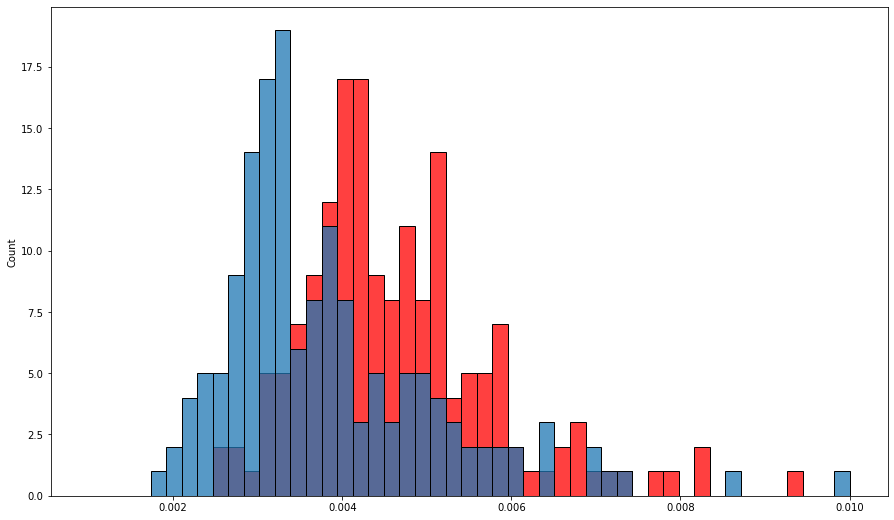

In [97]:
bins = np.linspace(0.001,0.01,50)

myr = 's49_MOD'
sns.histplot(prop_coef[myr + 'a'], bins = bins, color = 'r')
sns.histplot(prop_coef[myr + 'b'], bins = bins)